<a href="https://colab.research.google.com/github/lucasnserra/CustomerSegmentation/blob/main/Data_pre_processing_for_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook esta preparado para comprender el Preprocesamiento que se debe aplicar para cumplir con las suposiciones de K-Means y poder aplicar el modelo.

In [3]:
 #Se elije K-means para clusterizar a los clientes por su rapidez y eficacia sobre los datos. 
 #Suposiciones de K-Means
 # 1-todas las distribuciones son simetricas(No estan sesgadas)
 # 2-Las variables tienen mismos valores medios (metrica con mismo peso para el calculo) -Estandarizar-
 # 3- Escalar la varianza para cada variable -Escalar-
 # - K-Means asume que cada variable tiene igual valor promedio y varianza 


####Sequencia de Pipeline para aplicar K-Means
##### 1. Corregir Sesgo de los datos con una transformacion de registros (Log) --> Log Transformation solamente funciona con valores positivos
##### 2. Estandarizar variables al mismo valor promedio (se hace segundo ya que esto produce valores negativos)
##### 3. Escalamos la desviacion estandar
##### 4. Separamos el array para clusterizar del dataset original
##### 5. El resultado se ingresa nuevamente al dataset original para realizar los insights correspondientes.

In [8]:
#Importo Librerias
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [9]:
#Cargo el dataset del Raw en git ()
datamart_rfm = pd.read_csv('https://raw.githubusercontent.com/lucasnserra/CustomerSegmentation/main/rfm_datamart.csv')
datamart_rfm.head()


,CustomerID,Recency,Frequency,MonetaryValue
0,12747,3,25,948.70
1,12748,1,888,7046.16
2,12749,4,37,813.45
3,12820,4,17,268.02
4,12822,71,9,146.15


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

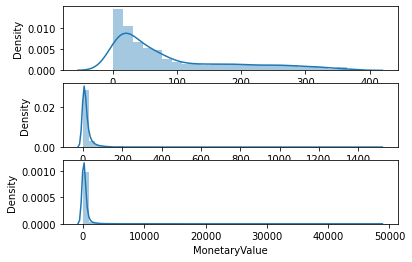

In [10]:
# Analizo Distribución de variables (de manera visual)
plt.subplot(3, 1, 1); sns.distplot(datamart_rfm['Recency'])
plt.subplot(3, 1, 2); sns.distplot(datamart_rfm['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(datamart_rfm['MonetaryValue'])
plt.show()


In [12]:
#Comienzo con el preprocesamiento
# 1- Dealing con el Sesgo a traves de la transformacion logaritmica
datamart_log = np.log(datamart_rfm)
# 2-inicio la estandatizacion de la media y escalo la desviacion estandar
scaler = StandardScaler()
scaler.fit(datamart_log)
datamart_normalized = scaler.transform(datamart_log)
# 3- Creo un DF
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)
datamart_normalized


,CustomerID,Recency,Frequency,MonetaryValue
0,-1.914291,-2.002202,0.865157,1.464940
1,-1.913516,-2.814518,3.815272,2.994692
2,-1.912742,-1.789490,1.189117,1.347598
3,-1.857877,-1.789490,0.546468,0.500595
4,-1.856336,0.337315,0.020925,0.037943
...,...,...,...,...
3638,1.647212,1.346554,-1.221955,-0.975812
3639,1.647753,1.029259,-1.221955,-1.125628
3640,1.648293,-1.276975,-1.221955,-1.152485
3641,1.648833,-1.789490,2.356706,0.866422


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

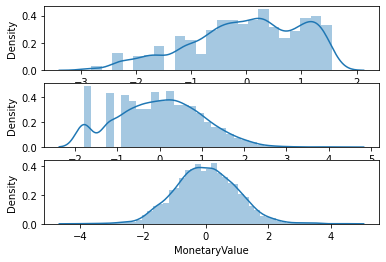

In [13]:
#Valido como se manejo los Sesgos con las transformaciones
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()